# Exercise 4: Analysis of historical COVID-19 data
Data from [The New York Times](https://github.com/nytimes/covid-19-data), based on reports from state and local health agencies.

In [2]:
# Load historical data for COVID-19 cases by state
import pandas as pd

covid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid['date'] = pd.to_datetime(covid['date']) # Convert date column to date format (necessary for seaborn x-axis to work)
covid = covid.assign(new_cases = covid.groupby(['state']).cases.diff()).fillna(0) # Calculate daily new cases
covid['new_cases'] = covid['new_cases'].clip(lower = 0) # Make drops in new cases zero

In [3]:
# Plot new cases by state
import seaborn as sb

def cases_vs_date(data, states):
    data = data[data['state'].isin(states)] # Select only rows matching indicated states
    data_wide = data.pivot(index = "date", columns = "state", values = "new_cases") # Convert to wide-form data
    plot = sb.lineplot(data = data_wide) # Create line plot
    plot.set(title = "New COVID-19 Cases by Date (Data from The New York Times)", # Set title
             xlabel = "Date", # Set axis labels 
             ylabel = "Cases")
    plot.set_xticklabels(plot.get_xticklabels(), 
                         rotation = 45, # Rotate x-axis labels
                         horizontalalignment = "right") # Shift x-axis labels to the left

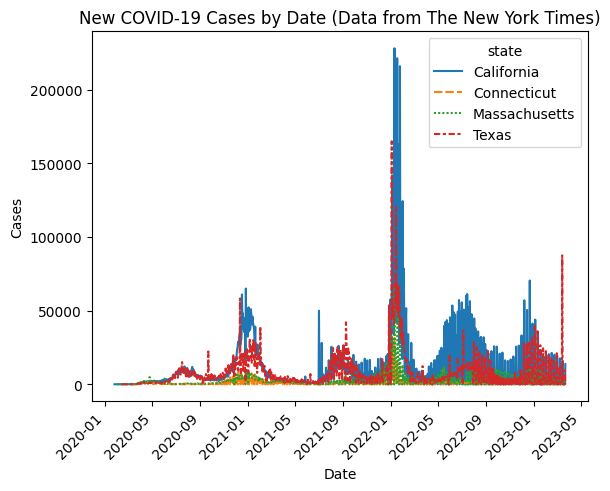

In [4]:
# Tests
import warnings
warnings.filterwarnings('ignore') # Suppress seaborn's warnings

states = ["Texas", "California", "Connecticut", "Massachusetts"]
cases_vs_date(covid, states)

**Limitations:** This method appears to be occasionally process daily new cases incorrectly, causing the number to sometimes dip below zero as seen on the graph.

In [4]:
# Code
def date_highest_new_cases(data, state):
    data = data[data['state'].str.contains(state)] # Select only rows matching indicated states
    return str(data.loc[data['new_cases'].idxmax(), ]['date'].date()) # Find date with highest number of daily cases

In [5]:
# Tests
states = ["California", "Texas", "Connecticut", "Massachusetts"]
for state in states:
    print(f"{state} had the highest number of COVID-19 cases on {date_highest_new_cases(covid, state)}.")

California had the highest number of COVID-19 cases on 2022-01-10.
Texas had the highest number of COVID-19 cases on 2022-01-03.
Connecticut had the highest number of COVID-19 cases on 2022-01-10.
Massachusetts had the highest number of COVID-19 cases on 2022-01-10.


In [6]:
# Code
from dateutil.parser import parse

def case_peaks(state_1, state_2):
     date_1 = parse(date_highest_new_cases(covid, state_1))
     date_2 = parse(date_highest_new_cases(covid, state_2))
     if date_1 < date_2:
          print(state_1, "peaked", (date_2 - date_1).days, "days ahead of", state_2) 
     elif date_1 > date_2:
          print(state_2, "peaked", (date_1 - date_2).days, "days ahead of", state_1) 
     else:
          print(state_1, "and", state_2, "peaked on the same day")          

In [7]:
# Tests
case_peaks("California", "New York")
case_peaks("Texas", "Texas")
case_peaks("Hawaii", "Montana")
case_peaks("Florida", "South Carolina")
case_peaks("District of Columbia", "Maryland")

New York peaked 2 days ahead of California
Texas and Texas peaked on the same day
Montana peaked 247 days ahead of Hawaii
Florida peaked 14 days ahead of South Carolina
Maryland peaked 1 days ahead of District of Columbia
